In [71]:
import pandas as pd
import os
import requests
import json
import matplotlib.pyplot as plt

In [63]:
DATA_PATH = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data/sssp_data.csv")

In [64]:
raw_data = pd.read_csv(DATA_PATH)

In [65]:
raw_data.head()

,Unnamed: 0,element,ecutwfc,ecutrho,dE
0,0,Ag,30.0,120.0,0.162125
1,1,Ag,35.0,140.0,0.162125
2,2,Ag,40.0,160.0,0.162125
3,3,Ag,45.0,180.0,0.162125
4,4,Ag,50.0,200.0,0.162125


In [74]:
raw_Ag = raw_data[raw_data['element'] == 'Ag']

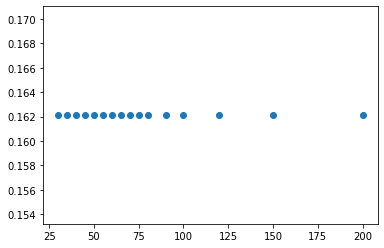

In [76]:
plt.scatter(raw_Ag['ecutwfc'], raw_Ag['dE'])

In [66]:
# LOADING ALL ELEMENT KEYS
url_table = requests.get("https://archive.materialscloud.org/record/file?record_id=862&filename=SSSP_1.1.2_PBE_efficiency.json&file_id=a5642f40-74af-4073-8dfd-706d2c7fccc2")
text_table = url_table.text
sssp_table = json.loads(text_table)
periodic_table_keys = list(sssp_table.keys())

In [67]:
data = raw_data.copy()

In [68]:
# ADD ATOMIC STRUCTURE
for element in periodic_table_keys:
    data[element] = 0.0
for idx, row in data.iterrows():
    current_element = row['element']
    data.loc[idx, current_element] = 1.0

In [69]:
# REMOVE UNNECESSARY COLUMNS
rel_cols = list(data.columns)
rel_cols.remove('Unnamed: 0')
rel_cols.remove('element')
data = data[rel_cols]
data['k_density'] = -1.0

In [70]:
data.head()

,ecutwfc,ecutrho,dE,Ag,Al,Ar,As,Au,B,Ba,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,k_density
0,30.0,120.0,0.162125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,35.0,140.0,0.162125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,40.0,160.0,0.162125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,45.0,180.0,0.162125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,50.0,200.0,0.162125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


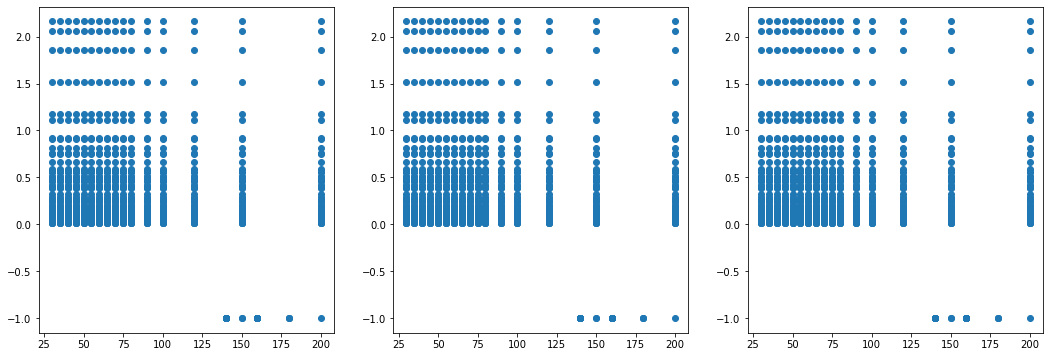

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].scatter(data['ecutwfc'], data['dE'])
ax[1].scatter(data['ecutwfc'], data['dE'])
ax[2].scatter(data['ecutwfc'], data['dE'])